# Online Retail Business Sales Analysis

## Outline

This notebook was created in Azure Data Studio and provides a sales analysis for an online retail business using PostgreSQL. 

The dataset was originally posted on [Kaggle](https://www.kaggle.com/carrie1/ecommerce-data) and contains almost 540,000 sales records and 9 columns, including a product description, quanitity of items sold, unit price, date of sale and country. 

The business questions answered in this notebook include:

- <span style="background-color:rgba(127, 127, 127, 0.1);">What are the sales figures for each country?</span>
- <span style="background-color:rgba(127, 127, 127, 0.1);">What is the overall sales trend?</span>
- How many new customers are there each month?
- When do customers make the most purchases?
- Which is the best selling product in each country?
- When were the largest orders made?
- Which customers made the largest orders?

This notebook replicates the analysis from a Python notebook, which answers the same business questions, which you can find [here](https://www.kaggle.com/atanaskanev/sales-analysis-and-visualization).

Although SQL is used to retrieve data which is then formatted for prentations using other tools, my aim is to make this notebook self-contained, for the purpose of which I have formatted table columns, for example, as currency, and have provided data visualizations of the queries.

## Importing the data into PostgreSQL:

Create the table:

In [11]:
CREATE TABLE online_retail
(
InvoiceNo VARCHAR      -- varchar since contains letters
,StockCode VARCHAR     -- varchar since contains letters
,Description VARCHAR
,Quantity INT
,InvoiceDate TIMESTAMP
,UnitPrice NUMERIC
,CustomerID NUMERIC    -- contains NULLs
,Country VARCHAR
,ItemTotal NUMERIC
)


Commands completed successfully

Total execution time: 00:00:00.007

Import the data:

In [12]:
COPY online_retail FROM '[filepath]\online_retail_cleaned.csv'
CSV HEADER
DELIMITER ','
ENCODING 'ISO-8859-1';

Commands completed successfully

Total execution time: 00:00:07.280

Look at the first few records:

In [3]:
SELECT *
FROM online_retail
LIMIT 15;

(15 row(s) affected)

Total execution time: 00:00:00.006

invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,itemtotal
536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12T08:26:00,2.55,17850.0,United Kingdom,15.299999999999999
536373,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12T09:02:00,2.55,17850.0,United Kingdom,15.299999999999999
536375,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12T09:32:00,2.55,17850.0,United Kingdom,15.299999999999999
536390,85123A,WHITE HANGING HEART T-LIGHT HOLDER,64,2010-01-12T10:19:00,2.55,17511.0,United Kingdom,163.2
536394,85123A,WHITE HANGING HEART T-LIGHT HOLDER,32,2010-01-12T10:39:00,2.55,13408.0,United Kingdom,81.6
536396,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12T10:51:00,2.55,17850.0,United Kingdom,15.299999999999999
536401,85123A,WHITE HANGING HEART T-LIGHT HOLDER,4,2010-01-12T11:21:00,2.95,15862.0,United Kingdom,11.8
536406,85123A,WHITE HANGING HEART T-LIGHT HOLDER,8,2010-01-12T11:33:00,2.55,17850.0,United Kingdom,20.4
536502,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12T12:36:00,2.95,16552.0,United Kingdom,17.700000000000003
536520,85123A,WHITE HANGING HEART T-LIGHT HOLDER,3,2010-01-12T12:43:00,2.95,14729.0,United Kingdom,8.850000000000001


##  What are the Sales Figures for Each Country?

First, let's see what percentage of total sales each country accounts for:

In [38]:
SELECT
    country
    ,ROUND(SUM(itemtotal), 0) AS country_sales
    ,CONCAT(ROUND(SUM(itemtotal)
     / 
     (SELECT SUM(itemtotal) FROM online_retail) *100 ,2)::text, '%') -- format as a percentage
      AS pct_of_total_sales
FROM online_retail
GROUP BY country
ORDER BY pct_of_total_sales DESC;

(38 row(s) affected)

Total execution time: 00:00:00.398

country,country_sales,pct_of_total_sales
United Kingdom,8439224,84.97%
Netherlands,283168,2.85%
EIRE,263277,2.65%
Germany,200877,2.02%
France,182331,1.84%
Australia,136990,1.38%
Switzerland,52505,0.53%
Spain,48923,0.49%
Belgium,36663,0.37%
Japan,35341,0.36%


As we see, the UK accounts for the predominant part of total sales.

One useful feature of Azure Data Studio is the ability to visualize SQL queries, although the customization of the charts is very limited:

###       Percent of Total Sales by Country

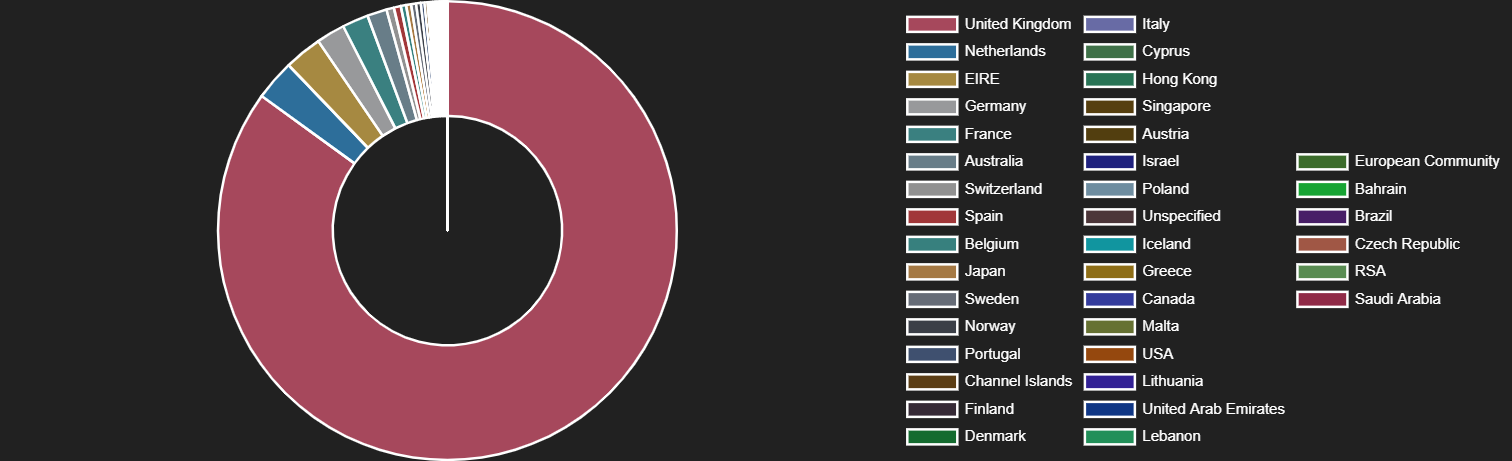

## What is the Overall Sales Trend?

First, let's check the date range of the data:

In [11]:
SELECT
    MIN(DATE(invoicedate)) AS first_date
    ,MAX(DATE(invoicedate)) AS last_date
FROM online_retail;

(1 row(s) affected)

Total execution time: 00:00:00.162

first_date,last_date
2010-01-12,2011-12-10


We see the data spans between 12 January 2010 and 10 December 2011, which is almost 2 years. 

Note that since the data does not cover the whole month of December 2011, sales figures are likely going to be low in this month, since they are about 12 days only.

Note that there are also no records for sales during the months of April 2010 and November 2010. 

And answer the question:

In [7]:
WITH cte AS
(
SELECT
    EXTRACT(YEAR FROM invoicedate)::int AS year
    ,EXTRACT(MONTH FROM invoicedate)::int AS month
    ,ROW_NUMBER() OVER(                              -- used to keep the order of months for sorting after the
        ORDER BY EXTRACT(YEAR FROM invoicedate)::int -- months' numbers have been converted to month names
                 ,EXTRACT(MONTH FROM invoicedate)::int
                )
    ,ROUND(SUM(itemtotal), 0) AS total_sales_this_month
FROM online_retail
GROUP BY 1,2
ORDER BY 1,2
)
SELECT
    CONCAT(TO_CHAR((TO_DATE(month::varchar, 'MM')), 'Mon'), ' ', year) AS month
    ,total_sales_this_month
FROM cte
ORDER BY row_number; -- maintain the order of months by sorting by 
                     -- the generated order from the cte above


(22 row(s) affected)

Total execution time: 00:00:00.629

month,total_sales_this_month
Jan 2010,58549
Feb 2010,46174
Mar 2010,45276
May 2010,30970
Jun 2010,53819
Jul 2010,84246
Aug 2010,43878
Sep 2010,52054
Oct 2010,56827
Dec 2010,313133


###               Total Sales Trend by Month

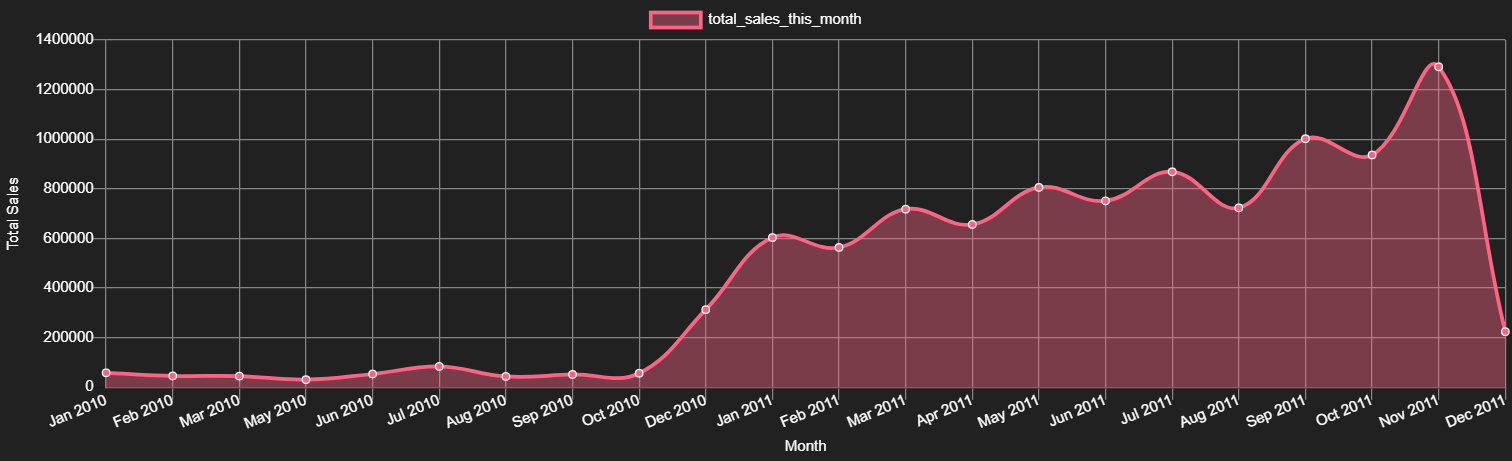  

Once again, note that the data contains no sales records for the months of April 2010 and November 2010, and the data covers only 12 days of December 2011, which is why we see the low sales figure for this month.

## How Many Customers Purchased Products Each Month?

## How Many New Customers were There Each Month?

New customers are customers who purchase an item for the first time. In other words, these are customers whose CustomerID appears in the records for the first time at the date of the purchase.

To find which CustomerIDs appear for the first time, we create a running list which progressively accumulates all unique customer ids, similarly to how a running total works. Then we check if the current CustomerID is in the list of CustomerIDs accumulated up to this point. To achieve this, we use STRING\_AGG as a window function with a window frame of UNBOUNDED PRECEDING and CURRENT ROW:

In [5]:
WITH get_only_unique_customerids_for_each_month AS
(
    SELECT
        TO_CHAR(invoicedate, 'YYYY-MM') AS month -- combine year and month for brevity
        ,CAST(customerid AS VARCHAR) AS customerid
        -- cast as varchar in order to use in a string_agg window function below
        ,COUNT(*) -- arbitrary aggregate function, this column will not be needed in next with clause
    FROM online_retail
    WHERE customerid IS NOT NULL -- filter out missing customerids
    GROUP BY month, customerid -- group by customerid as well in order to get unique customerid in every month
    ORDER BY month, customerid
),
create_lists_with_customerids_present_before AS
(
    SELECT
        month
        ,customerid
        ,STRING_AGG(customerid, ',') OVER(
            ORDER BY month, customerid
            ROWS BETWEEN UNBOUNDED PRECEDING
                         AND
                         CURRENT ROW
            ) AS lists
        -- creates running lists for each row, adding customer ids present before current row
    FROM get_only_unique_customerids_for_each_month
),
shift_lists_up_in_order_to_compare_with_previous_customerids AS
(
    SELECT
        month
        ,customerid
        ,LAG(lists, 1) OVER(ORDER BY month,customerid) AS lists
        -- shifts the lists with 1 up in order to compare the
        -- current row with the list of customer ids up to the previous row
    FROM create_lists_with_customerids_present_before
),
check_if_customerid_is_new AS
(
    SELECT
        month
        ,customerid
        ,CASE
            WHEN POSITION(customerid IN lists) > 0 
            THEN 0    -- if the current customerid is not in the list of 
            ELSE 1    -- customerids available up to this point, it is new -> return 1
         END AS is_new
        
    FROM shift_lists_up_in_order_to_compare_with_previous_customerids
),
final_table AS
(
    SELECT
        month
        ,ROW_NUMBER() OVER(ORDER BY month) -- used to preserve the order of months
        ,COUNT(customerid) AS unique_customers_this_month
        ,SUM(is_new) AS new_customers_this_month
        ,SUM(SUM(is_new)) OVER(   -- running total of new customers each month
            ORDER BY month
            ROWS BETWEEN UNBOUNDED PRECEDING
                        AND
                        CURRENT ROW
            ) AS total_unique_customers
    FROM check_if_customerid_is_new
    GROUP BY month  -- group by month and count how many
)                   -- new customerids there are each month

SELECT
    TO_CHAR(TO_DATE(month::varchar,'YYYY-MM'), 'Mon YYYY') AS month
    ,unique_customers_this_month
    ,new_customers_this_month
    ,total_unique_customers
FROM final_table
ORDER BY row_number -- maintains the order of months
;

(22 row(s) affected)

Total execution time: 00:00:02.851

month,unique_customers_this_month,new_customers_this_month,total_unique_customers
Jan 2010,98,98,98
Feb 2010,116,107,205
Mar 2010,55,49,254
May 2010,76,68,322
Jun 2010,90,76,398
Jul 2010,70,53,451
Aug 2010,112,87,538
Sep 2010,122,83,621
Oct 2010,54,38,659
Dec 2010,488,288,947


###          Customers by Month

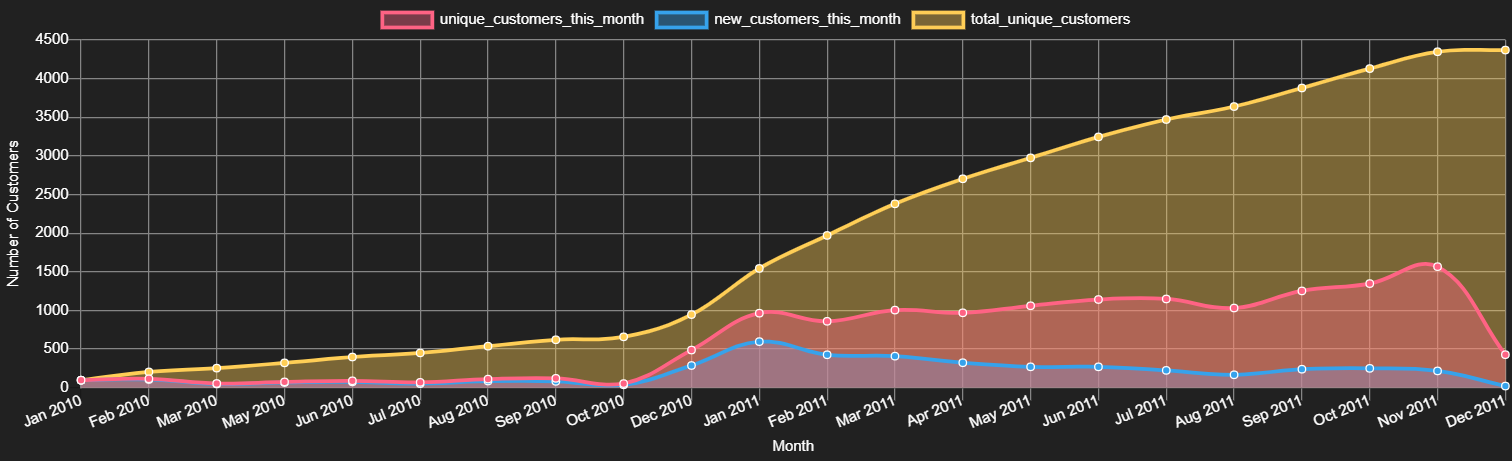

## What Time During the Day Do Customers Make the Most Purchases? 

We have seen spikes in sales around December 2010, which is likely related to the Christmas holidays. Since the last date of this dataset is December 2011 (which we assume is the present), we expect that the business would be running marketing campaigns for this year's Christmas hodidays as well. Therefore, it would be useful to find out what time of day customers make the most purchases in order to target the marketing campaigns around these times.

  

To check this, we can look at what time customers were making the most orders the previous December (i.e. December 2010), as well as the most common hours for purchases during the last 2 months (i.e. October and November 2011). Since we have data about 12 days of December 2011, we include these in the analysis as well.

In [82]:
WITH cte AS
(
SELECT
    EXTRACT(YEAR FROM invoicedate)::int AS year
    ,EXTRACT(MONTH FROM invoicedate)::int AS month
    ,EXTRACT(HOUR FROM invoicedate)::int AS hour
    ,COUNT(DISTINCT invoiceno) AS number_of_orders
FROM online_retail
WHERE TO_CHAR(invoicedate, 'YYYY-MM')
    IN ('2010-12', '2011-10', '2011-11', '2011-12') -- only data for the 4 months
GROUP BY 1,2,3
ORDER BY 1,2,3
)

SELECT 
    CONCAT(year, '-', month) AS month
    ,hour
    ,number_of_orders
FROM cte
ORDER BY 1,2;

(53 row(s) affected)

Total execution time: 00:00:01.240

month,hour,number_of_orders
2010-12,8,7
2010-12,9,51
2010-12,10,87
2010-12,11,127
2010-12,12,106
2010-12,13,112
2010-12,14,93
2010-12,15,118
2010-12,16,70
2010-12,17,41


This has given us the desired result, however it is difficult to read in this layout. It would be simpler to have the 4 months as rows and the different hours as columns. In other words, we are going to pivot the data so that month are rows, the hours are the columns (categories) and the numbers of orders are the values. To do this we use Postgres' CROSSTAB() function, which comes with the tablefunc additional module.  To use this module, we have to install it first:

In [53]:
CREATE EXTENSION IF NOT EXISTS tablefunc;

Commands completed successfully

Total execution time: 00:00:00.050

And the query:

In [83]:
SELECT *
 FROM CROSSTAB -- function for pivoting
 (
     
    $$WITH cte AS
        (
        SELECT
            EXTRACT(YEAR FROM invoicedate)::int AS year
            ,EXTRACT(MONTH FROM invoicedate)::int AS month
            ,EXTRACT(HOUR FROM invoicedate)::int AS hour
            ,COUNT(DISTINCT invoiceno) AS number_of_orders
        FROM online_retail
        WHERE TO_CHAR(invoicedate, 'YYYY-MM')
            IN ('2010-12', '2011-10', '2011-11', '2011-12') -- only data for the 4 months
        GROUP BY 1,2,3
        ORDER BY 1,2,3
        )

    SELECT 
        CONCAT(year, '-', month) AS month
        ,hour
        ,number_of_orders
    FROM cte
    ORDER BY 1,2$$

    , $$SELECT hours FROM generate_series(7,20) AS hours $$ -- columns with hours between 7 and 20

) AS ct(
        "month" TEXT,
        "7:00" INT,
        "8:00" INT,
        "9:00" INT,
        "10:00" INT,
        "11:00" INT,
        "12:00" INT,
        "13:00" INT,
        "14:00" INT,
        "15:00" INT,
        "16:00" INT,
        "17:00" INT,
        "18:00" INT,
        "19:00" INT,
        "20:00" INT
        );


(4 row(s) affected)

Total execution time: 00:00:00.713

month,7:00,8:00,9:00,10:00,11:00,12:00,13:00,14:00,15:00,16:00,17:00,18:00,19:00,20:00
2010-12,NULL,7,51,87,127,106,112,93,118,70,41,6,8,NULL
2011-10,5,52,123,253,257,368,317,289,252,163,77,13,23,4
2011-11,2,111,201,301,343,423,401,335,318,239,113,10,8,1
2011-12,NULL,10,56,61,74,92,77,62,59,42,17,15,17,2


Now it is easier to read and we see that the highest number of orders are placed around midday, more specifically at 12:00. Let's see a chart of these results:

###      Total Number of Orders for Each Hour of the Day

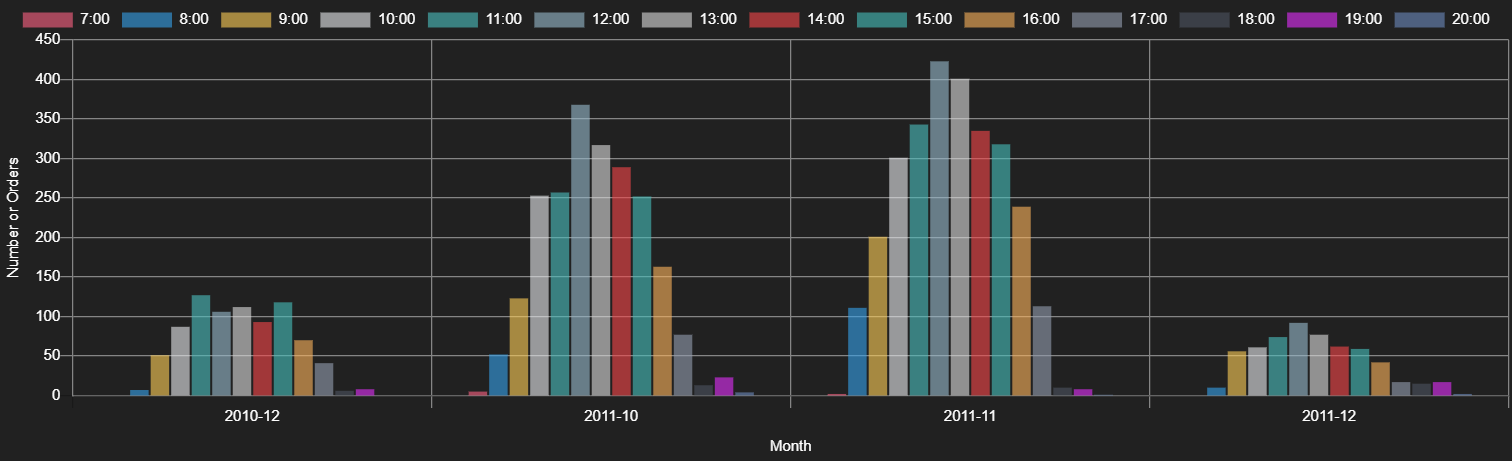

As mentioned above, chart customization is very limited in Azure Data Studio, and the colors for 12:00 and 17:00 appear very similar. The highest columns in October, November and December 2011 are in fact at 12:00, therefore, the marketing team could target their campaigns around this time to maximize conversions.

## Which was the best selling product in each country?

- how much sales did it generate?
- what percentage of the country's  total sales did it generate?

In [89]:
WITH sales_by_country_description AS
(
    SELECT 
        country
        ,description
        ,SUM(itemtotal) AS sum_sales
        ,SUM(SUM(itemtotal)) OVER(  -- window function over the grouped set
            PARTITION BY country
            ) AS total_country_sales
        ,RANK() OVER(               -- RANK() ensures all tied items are included
            PARTITION BY country
            ORDER BY SUM(itemtotal) DESC
            ) AS rank
    FROM online_retail
    GROUP BY country, description
)
SELECT
    country
    ,description AS highest_selling_product
    ,CONCAT('£ ', TRIM(TO_CHAR(sum_sales, '999G999'))) AS sum_sales -- format as currency
    ,CONCAT('£ ', TRIM(TO_CHAR(total_country_sales, '999G999'))) AS total_country_sales
    ,CONCAT(ROUND(sum_sales / total_country_sales * 100, 2)::text, '%') -- format as a percentage
      AS percent_of_country_sales
FROM sales_by_country_description
WHERE rank = 1; -- only the bestsellers

(42 row(s) affected)

Total execution time: 00:00:00.773

country,highest_selling_product,sum_sales,total_country_sales,percent_of_country_sales
Australia,RABBIT NIGHT LIGHT,"£ 3,376","£ 136,990",2.46%
Austria,PACK OF 6 SWEETIE GIFT BOXES,£ 302,"£ 8,698",3.48%
Austria,PACK OF 6 PANNETONE GIFT BOXES,£ 302,"£ 8,698",3.48%
Bahrain,ICE CREAM SUNDAE LIP GLOSS,£ 120,£ 548,21.88%
Belgium,ROUND SNACK BOXES SET OF4 WOODLAND,"£ 1,181","£ 36,663",3.22%
Brazil,REGENCY CAKESTAND 3 TIER,£ 175,"£ 1,144",15.32%
Canada,RETRO COFFEE MUGS ASSORTED,£ 534,"£ 3,115",17.15%
Channel Islands,REGENCY CAKESTAND 3 TIER,£ 518,"£ 20,086",2.58%
Cyprus,RUSTIC SEVENTEEN DRAWER SIDEBOARD,£ 580,"£ 12,931",4.49%
Czech Republic,ROUND SNACK BOXES SET OF4 WOODLAND,£ 71,£ 672,10.54%


## When were the Largest Orders Made?

In [9]:
WITH largest_orders AS
(
SELECT
    invoiceno AS invoice_no
    ,MAX(DATE(invoicedate)) AS date
    ,ROUND(SUM(itemtotal), 0) AS order_total
FROM online_retail
GROUP BY invoiceno
ORDER BY order_total DESC
LIMIT 15 -- show only the top 15; the plot below shows the top 100
)

SELECT 
    invoice_no
    ,TO_CHAR(date, 'dd-Mon-YYYY') AS date
    ,CONCAT('£ ', TRIM(TO_CHAR(order_total, '999G999'))) AS order_total -- format as currency
FROM largest_orders
ORDER BY order_total DESC;

(15 row(s) affected)

Total execution time: 00:00:00.615

invoice_no,date,order_total
574941,11-Jul-2011,"£ 52,941"
576365,14-Nov-2011,"£ 50,654"
567423,20-Sep-2011,"£ 31,698"
556917,15-Jun-2011,"£ 22,776"
572209,21-Oct-2011,"£ 22,206"
567381,20-Sep-2011,"£ 22,105"
563614,18-Aug-2011,"£ 21,880"
548203,29-Mar-2011,"£ 21,628"
550461,18-Apr-2011,"£ 21,536"
572035,20-Oct-2011,"£ 20,278"


###           Dates and Sizes of the Top 100 Largest Orders

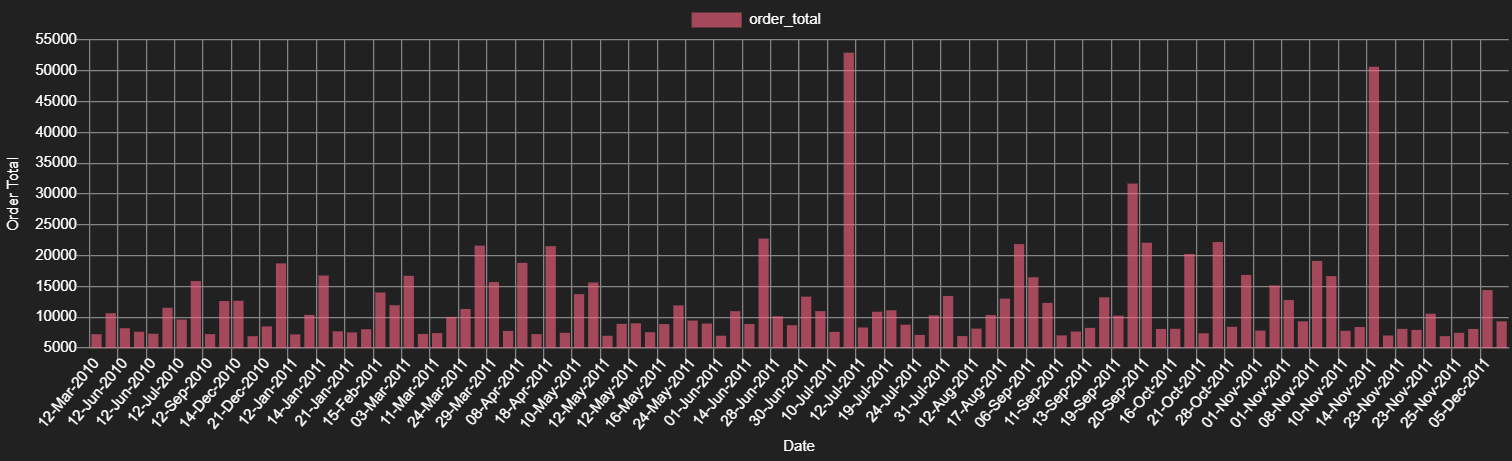

## Which Customers Contributed the Most to Total Sales?

Finally, let's see the customers with highest purchase figures and their corresponding number of orders:

In [98]:
WITH customers_orders AS
(
SELECT
    customerid
    ,COUNT(DISTINCT invoiceno) AS number_of_orders
    ,ROUND(SUM(itemtotal),0) AS total_purchases
FROM online_retail
WHERE customerid IS NOT NULL
GROUP BY customerid
)

SELECT
    customerid::int
    ,number_of_orders
    ,CONCAT('£ ', TRIM(TO_CHAR(total_purchases, '999G999'))) AS total_purchases -- format as currency
    ,CONCAT(
            ROUND(total_purchases / (SELECT SUM(itemtotal) FROM online_retail)*100,2)
            ,'%'
            ) AS pct_of_total_sales
FROM customers_orders
ORDER BY pct_of_total_sales DESC
LIMIT 15 -- only first 15;

(15 row(s) affected)

Total execution time: 00:00:01.440

customerid,number_of_orders,total_purchases,pct_of_total_sales
14646,74,"£ 278,466",2.80%
18102,62,"£ 256,438",2.58%
17450,51,"£ 188,421",1.90%
14911,247,"£ 132,573",1.33%
12415,24,"£ 123,638",1.24%
14156,66,"£ 113,384",1.14%
17511,45,"£ 88,128",0.89%
14096,18,"£ 65,054",0.66%
16684,31,"£ 65,892",0.66%
13694,60,"£ 62,653",0.63%


###             Customers with the Largest Total Purchases (£)

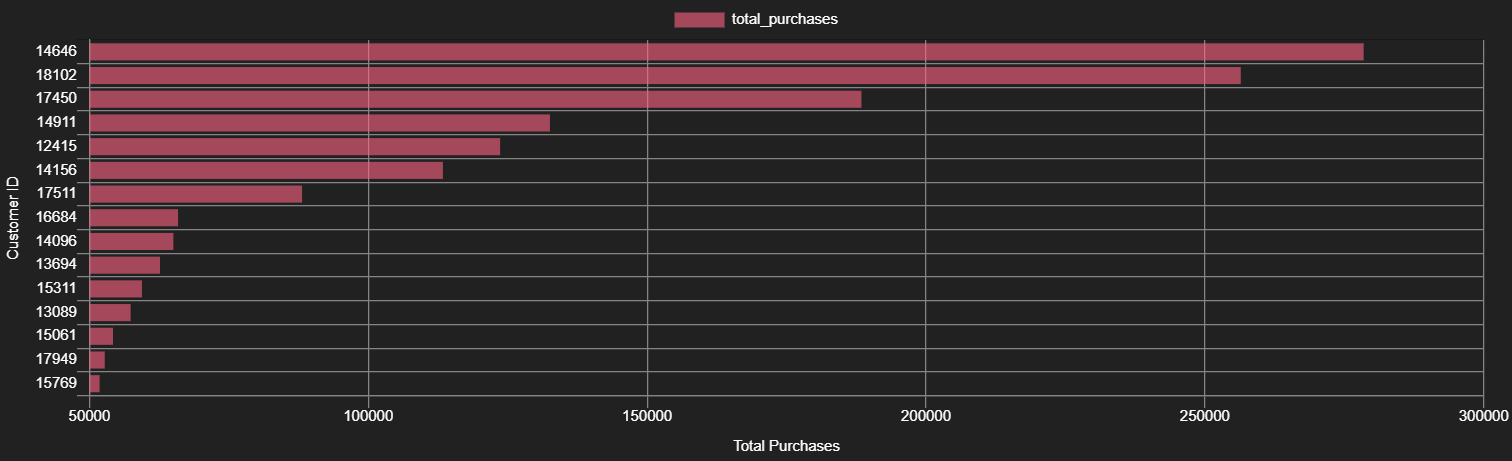

## Thank you for reading my notebook!